In [1]:
import gempipe
import cobra
import pandas as pnd
import pickle


# multistrain analysis

In [2]:
report = pnd.read_csv('gempipe/output_derive/derive_strains.csv', index_col=0)
report = report.rename(columns={'species':  'subsp.'})

# import binary feature tables:
aux = pnd.read_csv('gempipe/output_derive/aux.csv', index_col=0)
cnps = pnd.read_csv('gempipe/output_derive/cnps.csv', index_col=0)
rpam = pnd.read_csv('gempipe/output_derive/rpam.csv', index_col=0)

# mark reactions added by gempipe:
Lreuteri_530 = cobra.io.load_json_model('reference/Lreuteri_530_fixed.json')
rids_Lreuteri_530 = [r.id for r in Lreuteri_530.reactions]
rpam.index = [i + '*' if i not in rids_Lreuteri_530 else i for i in rpam.index ]

# exclude N-P-S sources from tested substrates:
only_c = cnps[[i.startswith('[C]') for i in cnps.index.to_list()  ]]

# exclude B12 biosynthesis reactions from the reaction dataset:
B12_reacs = ['GLUTRR', 'G1SAT', 'PPBNGS', 'HMBS', 'UPP3S', 'UPP3MT', 'SRCHCOC', 
             'COPREC2MT', 'COPREC3MT', 'COPREC4MT', 'COPRECT', 'COPREC6R2',
             'COPREC6R2', 'COPREC6MT', 'COPRECI', 'CBIA', 'R05218', 
             'R05220', 'R05225', 'ADCOBAPS', 'ACBIPGT', 'NNDMBRT', 'ADEADOCBLS', 
             'ADEADOCBLPP']
rpam_noB12 = rpam[rpam.index.isin(B12_reacs)==False]

# import gapfilling matrix
gfmatrix = pnd.read_csv('gempipe/output_derive/gf_matrix_strains.cdm_reuteri.csv', index_col=0).T

# with B12

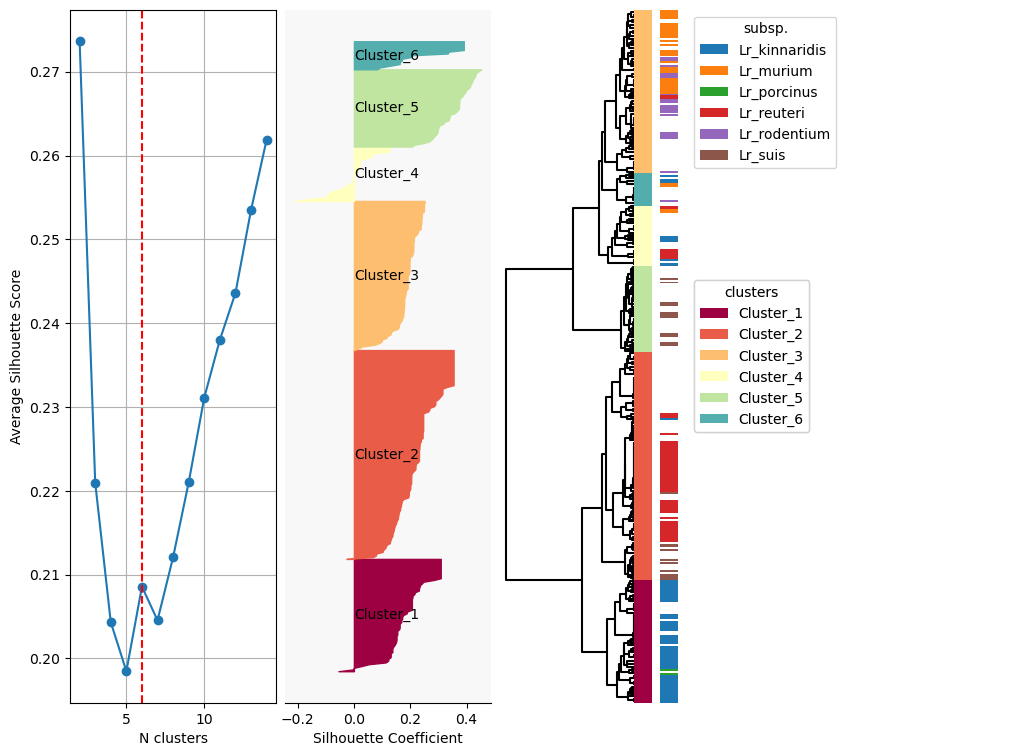

In [5]:
fig, acc_to_cluster, cluster_to_color = gempipe.silhouette_analysis( 
    figsize = (12,9), forcen=6, ctotest=range(2,15,1), 
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables={'auxotrophy': aux, 'substrate': only_c, 'reaction': rpam}
)

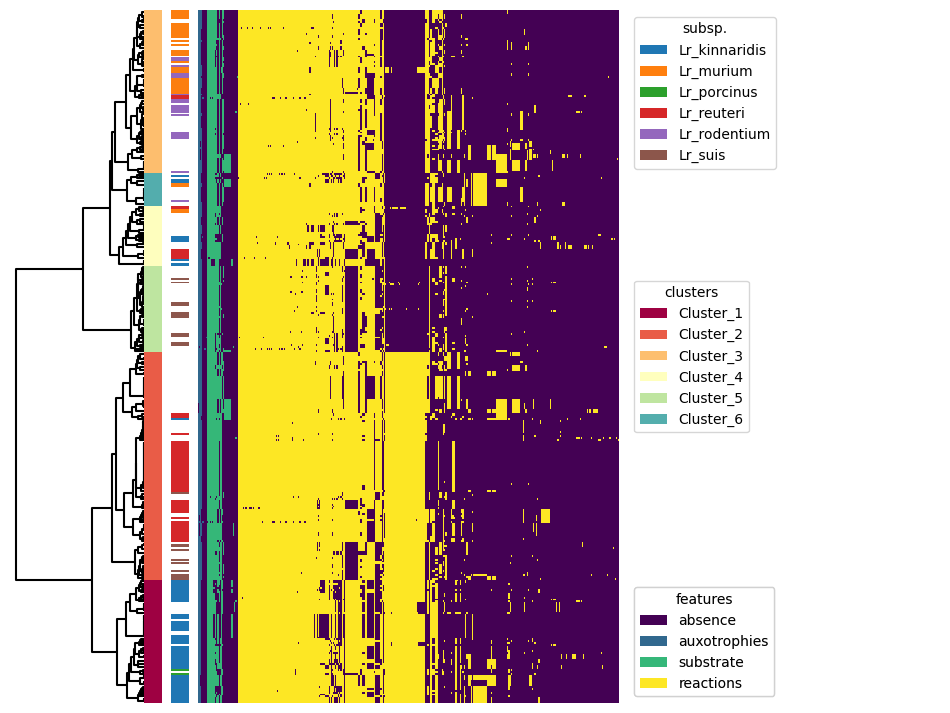

In [6]:
fig, ord_data_bool = gempipe.heatmap_multilayer(
    figsize = (12,9), acc_to_cluster=acc_to_cluster, cluster_to_color=cluster_to_color, 
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables = {'auxotrophies': aux, 'substrate': only_c, 'reactions': rpam},  
)

# without B12

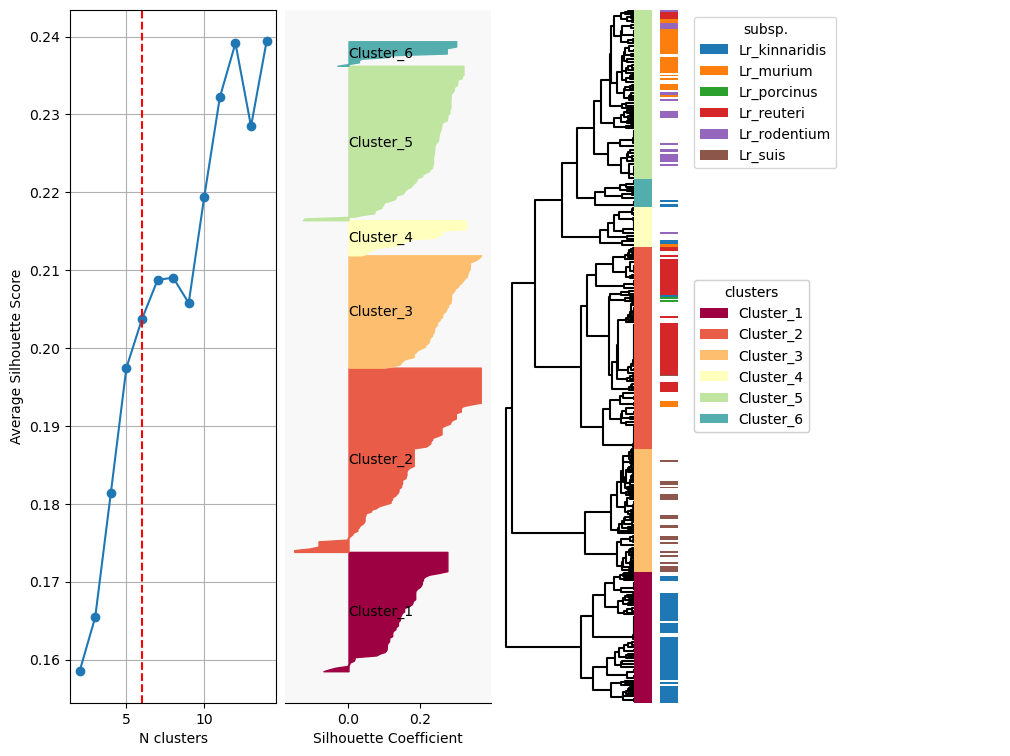

In [8]:
fig, acc_to_cluster, cluster_to_color = gempipe.silhouette_analysis( 
    figsize = (12,9), forcen=6, ctotest=range(2,15,1), 
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables={'auxotrophy': aux, 'substrate': only_c, 'reaction': rpam_noB12}
)

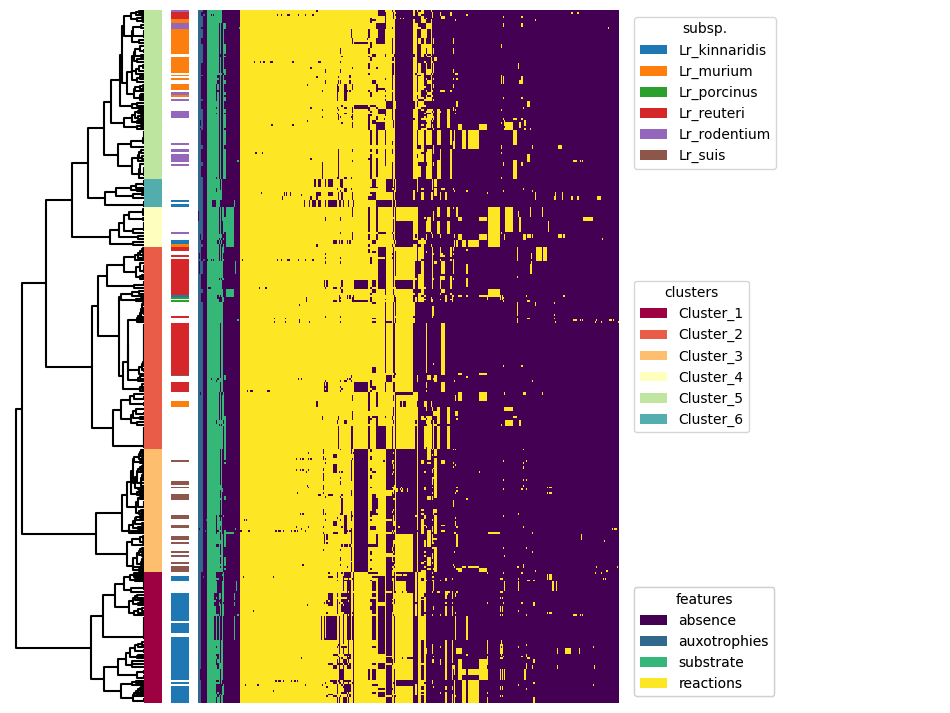

In [9]:
fig, ord_data_bool = gempipe.heatmap_multilayer(
    figsize = (12,9), acc_to_cluster=acc_to_cluster, cluster_to_color=cluster_to_color, 
    derive_report=report, report_key='subsp.', excludekeys=['other_Lr'],
    tables = {'auxotrophies': aux, 'substrate': only_c, 'reactions': rpam_noB12},  
)

In [10]:
# save for the next notebook
with open("gempipe/acc_to_cluster.pkl", "wb") as file:
    pickle.dump(acc_to_cluster, file)


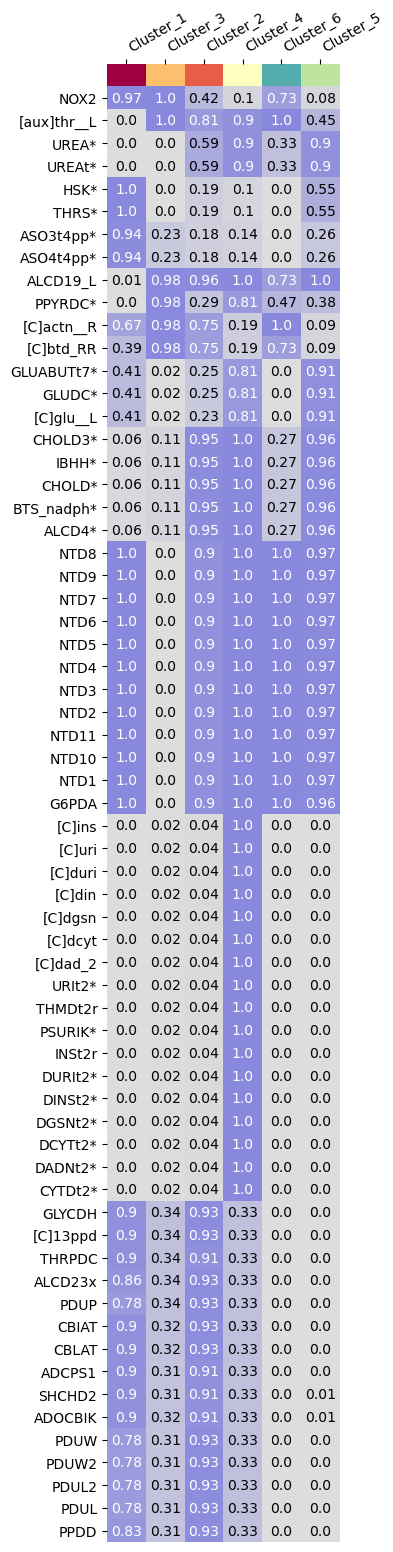

In [11]:
fig, df_relfreq = gempipe.discriminant_feat(ord_data_bool, acc_to_cluster, cluster_to_color, threshold=0.90)

# directly use the Li2021 clusters

In [12]:
ord_data_bool_Li2021 = ord_data_bool.loc[report['subsp.']!='other_Lr']
acc_to_cluster_Li2021 = {i: report.loc[i, 'subsp.'] for i in ord_data_bool_Li2021.index}
cluster_to_color_Li2021 = {s: f'C{i}' for i, s in enumerate(sorted(list(set(acc_to_cluster_Li2021.values()))))}

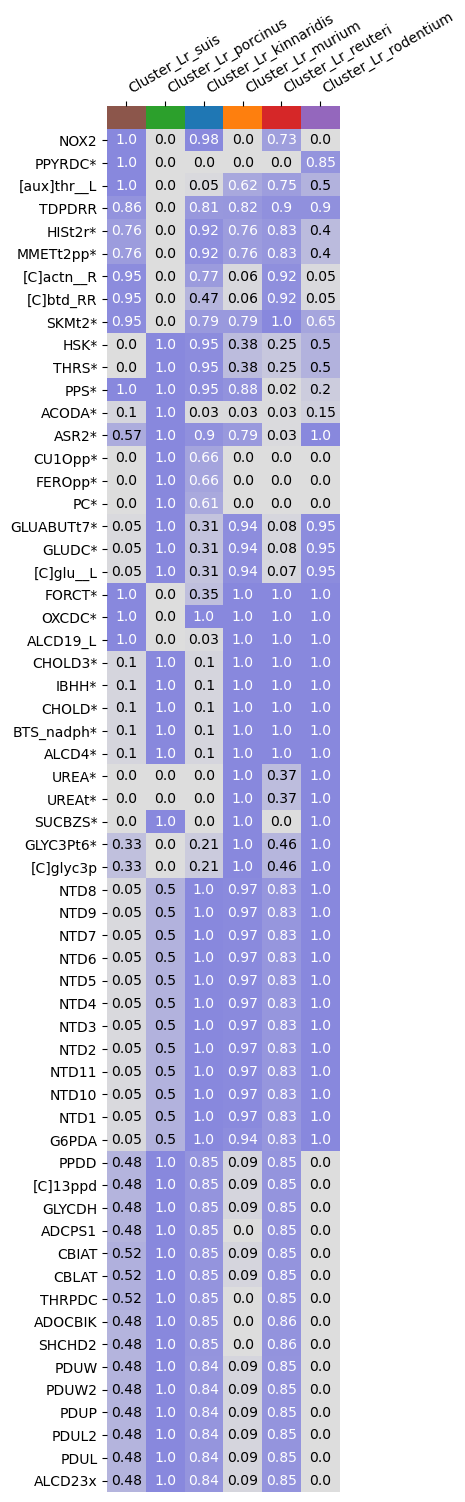

In [13]:
fig, df_relfreq = gempipe.discriminant_feat(ord_data_bool_Li2021, acc_to_cluster_Li2021, cluster_to_color_Li2021, threshold=0.90)